In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Открываем файл diamonds.csv
df = pd.read_csv('Heart_Disease_Prediction.csv')
df.head()

,index,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


Размерность данных

In [2]:


# Определение размерности данных
shape = df.shape

# Вывод размерности данных
print("Размерность данных:", shape)


Размерность данных: (270, 15)


Исследование на наличие пропусков

In [3]:

# df.isna() - проверку на пустые значение
print("________________________________________")
print(df.isna().sum())

________________________________________
index                      0
Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64


Вывод: Пропусков нет, значит можем работать со всей таблицей

In [4]:
from sklearn import preprocessing

# 1. Создадим модель кодировщика
label_encoder = preprocessing.LabelEncoder()

# 2. Обучение кодировщика: по сути тут создает словарь уникальных слов из переданного массива,
# соотносит для каждого слова число (все что делали выше мы, только тут автоматизированно)
label_encoder.fit(df['Heart Disease'])

# на этом этапе по сути применяет полученный словарь в переданным данных (в данном случае мы передали столбец lunch)
df['Heart Disease'] = label_encoder.transform(df['Heart Disease'])

df.head()

,index,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [5]:
df = pd.get_dummies(df, columns=['Chest pain type','Slope of ST', 'Thallium'])

In [6]:
df

,index,Age,Sex,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,...,Chest pain type_1,Chest pain type_2,Chest pain type_3,Chest pain type_4,Slope of ST_1,Slope of ST_2,Slope of ST_3,Thallium_3,Thallium_6,Thallium_7
0,0,70,1,130,322,0,2,109,0,2.4,...,False,False,False,True,False,True,False,True,False,False
1,1,67,0,115,564,0,2,160,0,1.6,...,False,False,True,False,False,True,False,False,False,True
2,2,57,1,124,261,0,0,141,0,0.3,...,False,True,False,False,True,False,False,False,False,True
3,3,64,1,128,263,0,0,105,1,0.2,...,False,False,False,True,False,True,False,False,False,True
4,4,74,0,120,269,0,2,121,1,0.2,...,False,True,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,265,52,1,172,199,1,0,162,0,0.5,...,False,False,True,False,True,False,False,False,False,True
266,266,44,1,120,263,0,0,173,0,0.0,...,False,True,False,False,True,False,False,False,False,True
267,267,56,0,140,294,0,2,153,0,1.3,...,False,True,False,False,False,True,False,True,False,False
268,268,57,1,140,192,0,0,148,0,0.4,...,False,False,False,True,False,True,False,False,True,False


In [7]:
from sklearn import preprocessing

# 1. Создадим модель кодировщика
label_encoder = preprocessing.LabelEncoder()

# 2. Обучение кодировщика: по сути тут создает словарь уникальных слов из переданного массива,
# соотносит для каждого слова число (все что делали выше мы, только тут автоматизированно)
label_encoder.fit(df['EKG results'])

# на этом этапе по сути применяет полученный словарь в переданным данных (в данном случае мы передали столбец lunch)
df['EKG results'] = label_encoder.transform(df['EKG results'])

df.head()

,index,Age,Sex,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,...,Chest pain type_1,Chest pain type_2,Chest pain type_3,Chest pain type_4,Slope of ST_1,Slope of ST_2,Slope of ST_3,Thallium_3,Thallium_6,Thallium_7
0,0,70,1,130,322,0,2,109,0,2.4,...,False,False,False,True,False,True,False,True,False,False
1,1,67,0,115,564,0,2,160,0,1.6,...,False,False,True,False,False,True,False,False,False,True
2,2,57,1,124,261,0,0,141,0,0.3,...,False,True,False,False,True,False,False,False,False,True
3,3,64,1,128,263,0,0,105,1,0.2,...,False,False,False,True,False,True,False,False,False,True
4,4,74,0,120,269,0,2,121,1,0.2,...,False,True,False,False,True,False,False,True,False,False


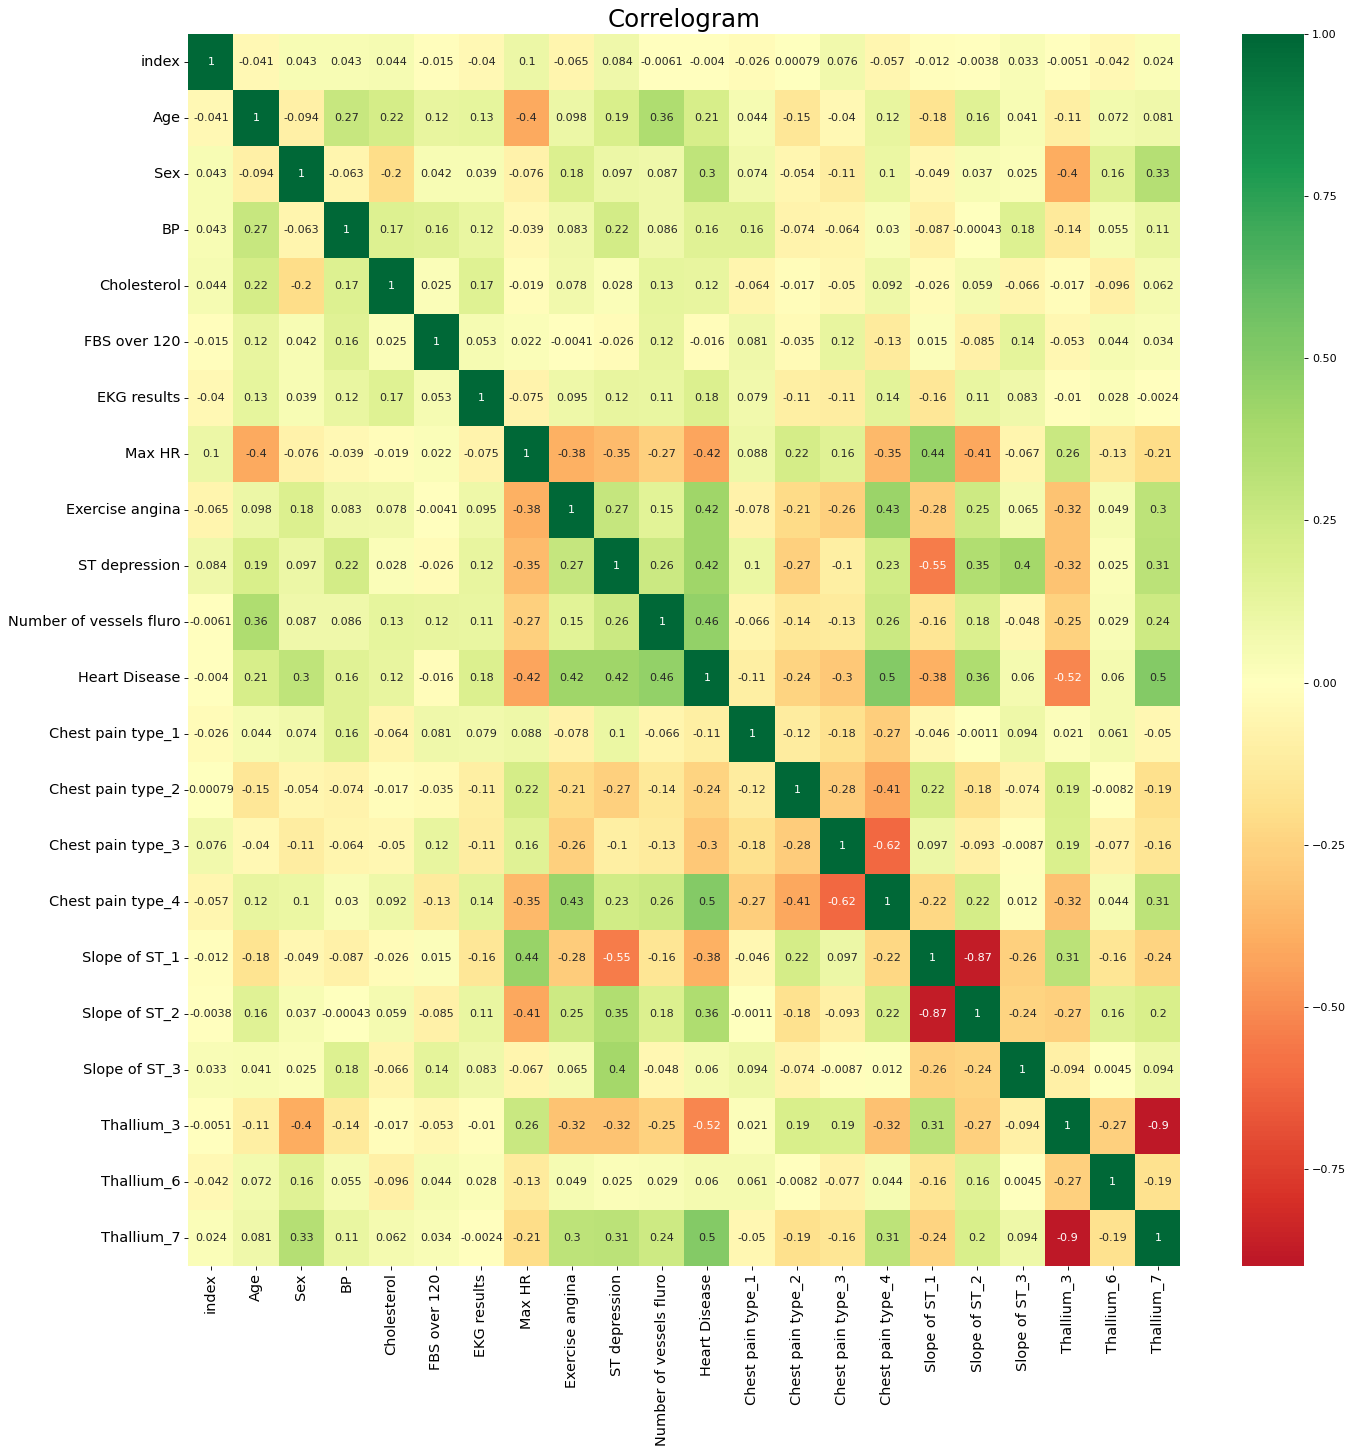

In [8]:
plt.figure(figsize=(20,20), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)
plt.title('Correlogram', fontsize=22)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()


Text(0.5, 1.0, 'ST depression')

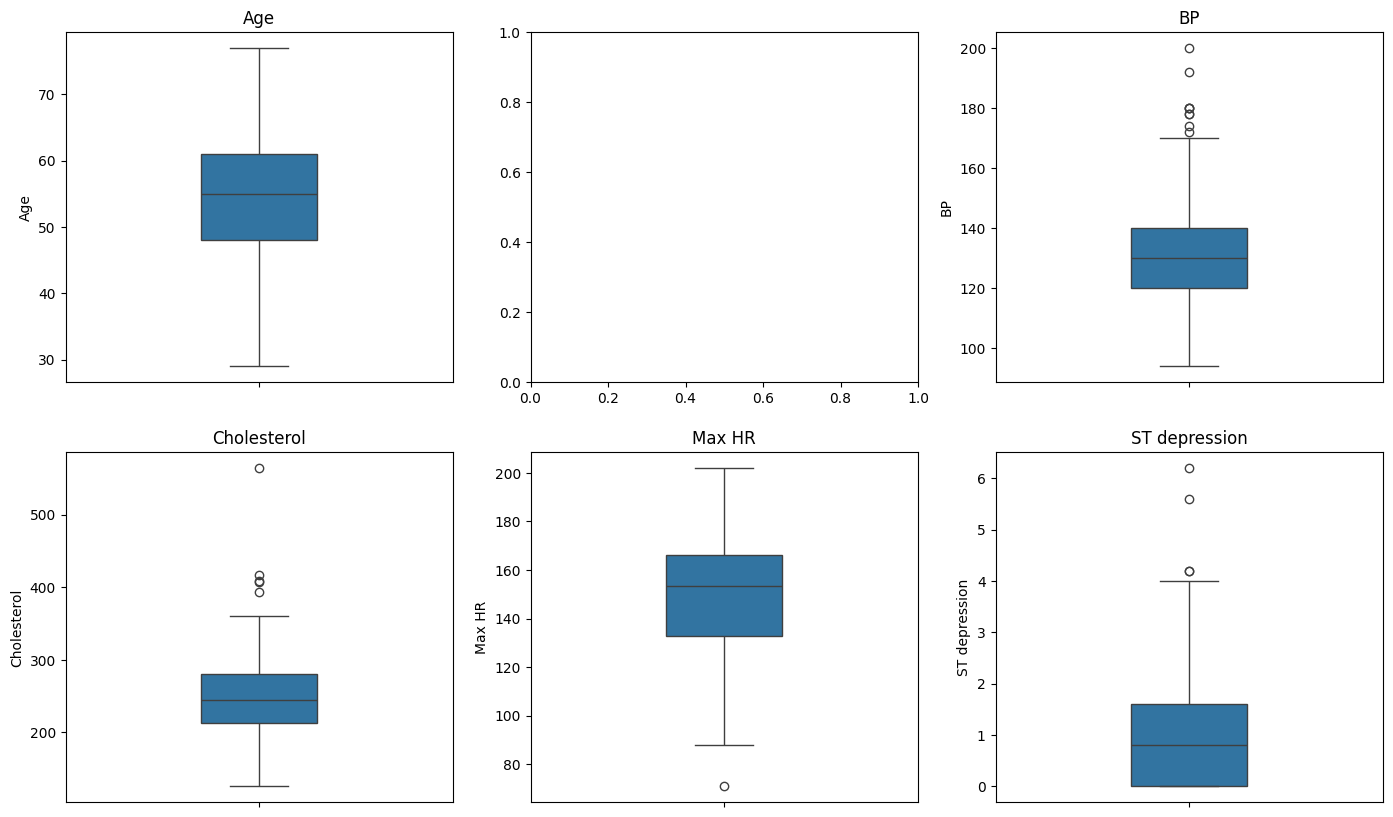

In [9]:
fig, axes = plt.subplots(2, 3, figsize=(17,10))
sns.boxplot(df['Age'], ax=axes[0,0], width=0.3).set_title('Age')
sns.boxplot(df['BP'], ax=axes[0,2], width=0.3).set_title('BP')
sns.boxplot(df['Cholesterol'], ax=axes[1,0], width=0.3).set_title('Cholesterol')
sns.boxplot(df['Max HR'], ax=axes[1,1], width=0.3).set_title('Max HR')
sns.boxplot(df['ST depression'], ax=axes[1,2], width=0.3).set_title('ST depression')

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [11]:
X = df.drop(['Heart Disease'], axis=1)
y = df['Heart Disease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = LogisticRegression()
model.fit(X_train, y_train)
answers_pred = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


коэффициенты влияния признаков на целевую переменную

In [12]:
model.coef_

array([[ 6.00594740e-04, -3.61764876e-02,  1.05610065e+00,
         1.64886497e-02,  5.76084862e-03, -6.84535926e-02,
         1.35108219e-01, -2.75467744e-02,  7.84968669e-01,
         2.60052351e-01,  1.02889797e+00, -2.55547146e-01,
        -1.60565519e-01, -4.64750395e-01,  9.17955661e-01,
        -2.44472502e-01,  3.44862617e-01, -6.32975146e-02,
        -6.05366505e-01, -8.43871749e-02,  7.26846280e-01]])

точность предсказания

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, answers_pred))

0.9135802469135802


проверка сходства количества признаков и ответов

In [ ]:
print(X_train.shape)
print(y_train.shape)

(189, 21)
(189,)


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

confusion_matrix(y_test, answers_pred)

array([[43,  2],
       [ 5, 31]])

In [ ]:
df_y = pd.DataFrame(y_test)
df_y.value_counts()

Heart Disease
0                45
1                36
Name: count, dtype: int64

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, answers_pred).ravel()
print("TN:", tn)
print("FP:", fp)
print("FN:", fn)
print("TP:", tp)

TN: 43
FP: 2
FN: 5
TP: 31


точность

In [ ]:
accuracy_score(y_test, answers_pred)

0.9135802469135802

полнота

In [ ]:
recall_score(y_test, answers_pred)

0.8611111111111112

 доля объектов, названных классификатором положительными и при этом действительно являющимися положительными.

In [ ]:
precision_score(y_test, answers_pred)

0.9393939393939394

Сочетание precision и recall, дает некоторый компромисс между ними двумя, оценка F1 достигает своего наилучшего значения в 1 и худшее в 0

In [ ]:
f1_score(y_test, answers_pred)

0.8985507246376813